首先，導入所需模組。<br>

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output

撰寫一函式-最終整體影像呈現形式。<br>

In [93]:
def show_img(img):
    plt.style.use('dark_background')
    imag_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(imag_rgb)
    plt.show()

撰寫二函式-影像相關細部處理流程。<br>

In [104]:
def img_processing(img):
    
    #將影像色彩轉換成灰色調
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    #手動設定影像亮度從175到255
    ret1, th1 = cv2.threshold(img, 175, 255, cv2.THRESH_BINARY)
    
    #將影像加入otsu演算法自動設定閥值，即使手動設定影像亮度從255到255，結果也不會呈現一張全黑影像
    ret2, th2 = cv2.threshold(img, 255, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
    
    #再將影像加入不同特效-高斯模糊濾鏡
    blur = cv2.GaussianBlur(img, (3,33), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    #Histrogram直方圖:將影像亮度數值0到255呈現為數據比例圖型式
    images = [img, 0, th1, img, 0, th2, blur, 0, th3]
    titles = ['Original Noisy Image', 'Original Noisy Image', 'Gaussian filtered Image', 
             'Histogram', 'Histogram', 'Histogram', 
             'Global Thresholding (v=175)', 'Otsu\'s Thresholding (v=255)', 'Otsu\'s Thresholding', 
             'Histogram','Histogram', 'Histogram']
    
    #資料圖形化視覺化：設定整體圖案大小並使用子圖方式來進行不同影像效果比對，以及排版、xy座標數值設置
    plt.figure(figsize=(18,18))
    for i in range(3):
        plt.subplot(4,3,0*3+i+1)
        plt.imshow(images[i*3], 'gray')
        plt.title(titles[0*3+i])
        
        plt.subplot(4,3,1*3+i+1)
        plt.hist(images[i*3].ravel(), 256, [0, 300])
        plt.title(titles[1*3+i])
        
        plt.subplot(4,3,2*3+i+1)
        plt.imshow(images[i*3+2], 'gray')
        plt.title(titles[2*3+i])
        
        plt.subplot(4,3,3*3+i+1)
        plt.hist(images[i*3+2].ravel(), 256, [0, 300])
        plt.title(titles[3*3+i])
        
    plt.show()

最後，調用實驗影像並帶入函式執行。<br>

origin picture:


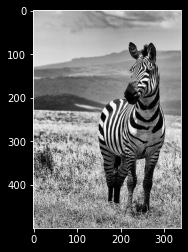

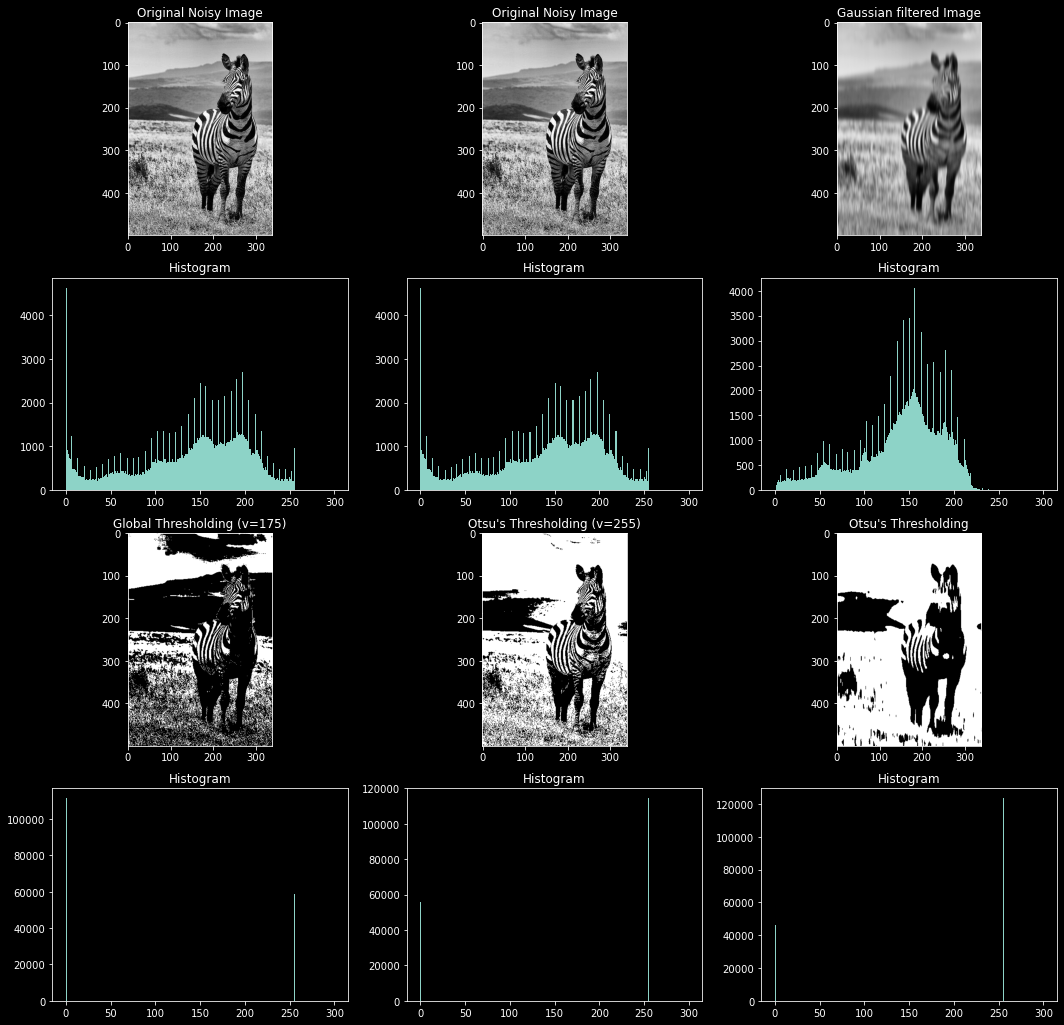

In [105]:
file_name = "./data/zebra.jpg"
origin_img = cv2.imread(file_name)
print("origin picture:")
show_img(origin_img)

img_processing(origin_img)

結論：根據上述程式碼調參、以及影樣和Histogram所呈現出來的效果，得知加入otsu演算法能夠自動將圖像進行二值化並有效提取圖中的主要物件。<br>